In [4]:
import requests
from bs4 import BeautifulSoup
import re 
import pandas as pd

In [ ]:
res = requests.get("https://github.com/google")

soup = BeautifulSoup(res.content,"html.parser")

In [ ]:
# Sayda sayısına erişim
pages = soup.find_all("div",class_ ="pagination")[0].find_all("a")
#print(pages)
a = str(pages[5])
pagess = (a[-6:-4])
#print(pagess)

In [ ]:
a_name, a_desc, a_dil, a_star, a_fork, a_lisans = [],[],[],[],[],[]

In [ ]:
for pagesnumber in range(1, int(pagess) + 1 ):
    pagesrequest = requests.get("https://github.com/google?page="+ str(pagesnumber))
    #print(pagesrequest)
    source = pagesrequest.text
    
    soup = BeautifulSoup(source, "html.parser")
    repo_list = soup.find('div', attrs={"class": "repo-list"})
    repos = repo_list.find_all('li')
    
    Format = """
    Isim: {name}
    Aciklama: {desc}
    DİL : {lang}
    LİSANS:{lisans}
    FORK: {fork}
    STAR: {star}
    """
    ##FORK: {fork}
    
    for repo in repos:
        #repo simi
        name = repo.find("a").text.strip()
        desc = "Açıklama yok"
    
        if repo.find('p'):  ## Eğer açıklama varsa
            desc = repo.find('p').text.strip()
    
        try:
            lang = repo.find("span",class_="mr-3").text.strip()
        except AttributeError:
            lang = "Dil yok"
        if lang == "Apache-2.0":
            lang = "Dil yok"
        
        star =  repo.find("a" ,class_="mr-3").next_sibling.next_sibling.text.strip()
        fork = repo.find("a", class_="mr-3").text.strip()
    
        try:
            lisans = repo.find("span",class_="mr-3").next_sibling.next_sibling.text.strip()
        except:
            lisans = "Lisans yok"
        if lisans.isdigit():
            lisans = "Lisans yok"
        elif  lisans == "" :
            lisans = "Lisans yok"
    
        a_name.append(name)
        a_desc.append(desc)
        a_dil.append(lang)
        a_star.append(star)
        a_fork.append(fork)
        a_lisans.append(lisans)
        print(Format.format(name=a_name, desc=a_desc, lang=a_dil,star=a_star,fork=a_fork,lisans=a_lisans))

In [ ]:
df = pd.DataFrame({'isim':a_name,'Aciklama':a_desc,'Dil':a_dil,'Star':a_star,'Fork':a_fork,'Lisans':a_lisans})
print (df.head())

In [ ]:
# veri ayrıştırma işlemi bitti csv dosyasına kaydettik
df.to_csv('google-github-analiz.csv')

In [ ]:
# Yeni csv 

In [5]:
df = pd.read_csv("google-github-analiz.csv")

In [6]:
df.head()

,Unnamed: 0,Unnamed: 0.1,isim,Aciklama,Dil,Star,Fork,Lisans
0,0,0,iree,👻,C++,215,27,Apache-2.0
1,1,1,gapid,Graphics API Debugger,Go,"1,497",256,Apache-2.0
2,2,2,ggrc-core,GGRC Core,Python,487,339,Lisans yok
3,3,3,ground-android,Ground mobile data collection app for Android,Java,77,37,Apache-2.0
4,4,4,honggfuzz,Security oriented fuzzer with powerful analysi...,C,"1,766",371,Apache-2.0


In [7]:
df = df.drop(columns=["Unnamed: 0"])


In [8]:
df = df.drop(columns=["Unnamed: 0.1"])

In [9]:
df.head()

,isim,Aciklama,Dil,Star,Fork,Lisans
0,iree,👻,C++,215,27,Apache-2.0
1,gapid,Graphics API Debugger,Go,"1,497",256,Apache-2.0
2,ggrc-core,GGRC Core,Python,487,339,Lisans yok
3,ground-android,Ground mobile data collection app for Android,Java,77,37,Apache-2.0
4,honggfuzz,Security oriented fuzzer with powerful analysi...,C,"1,766",371,Apache-2.0


In [10]:
df.describe()
# Programlama dili olarak python
# Lisans olarak Apache-2.0 


,isim,Aciklama,Dil,Star,Fork,Lisans
count,1666,1666,1666,1666,1666,1666
unique,1666,1119,64,566,323,21
top,stumblybot,Açıklama yok,Python,0,4,Apache-2.0
freq,1,545,309,77,87,1249


In [11]:
# eksik veri yok
df.isnull().sum()

isim        0
Aciklama    0
Dil         0
Star        0
Fork        0
Lisans      0
dtype: int64

In [12]:
# Kullanılan tüm diller
df['Dil'].unique()

array(['C++', 'Go', 'Python', 'Java', 'C', 'CMake', 'Jupyter Notebook',
       'TypeScript', 'SystemVerilog', 'JavaScript', 'Dart', 'Dil yok',
       'Rust', 'HTML', 'Objective-C', 'Shell', 'Kotlin', 'TeX',
       'Starlark', 'Haskell', 'CSS', 'Jsonnet', 'Vim script', 'Makefile',
       'C#', '0', 'Groovy', 'PHP', 'Common Lisp', 'R', 'Lasso', 'Ruby',
       'Scheme', 'Swift', 'Vue', 'TSQL', 'LLVM', 'Lua', 'MATLAB', 'Perl',
       'PowerShell', 'Emacs Lisp', 'Visual Basic', 'Scala', 'PureBasic',
       'Coq', 'Verilog', 'OpenEdge ABL', 'Clojure', 'Idris',
       'KiCad Layout', 'Bison', 'Elm', 'BSD-3-Clause', 'Protocol Buffer',
       'Eagle', 'Puppet', 'OpenSCAD', 'Elixir', 'AppleScript', 'Groff',
       'Processing', 'Erlang', 'Gosu'], dtype=object)

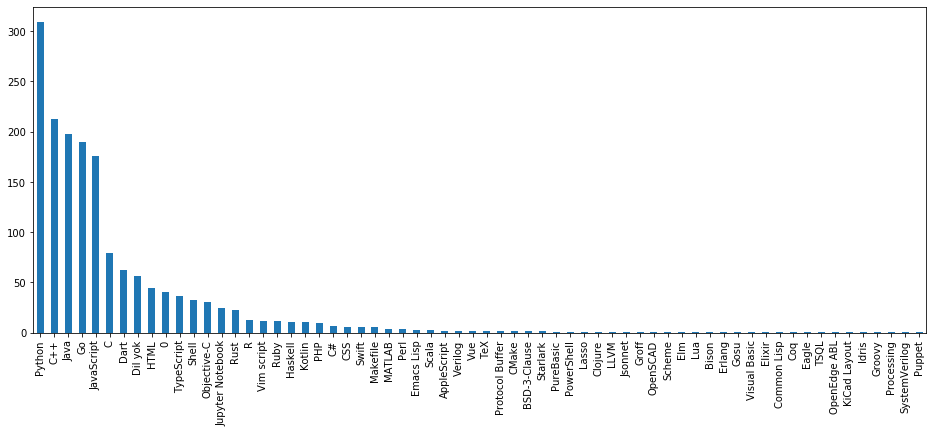

In [13]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16,6))
df['Dil'].value_counts().plot.bar()

In [14]:
#Dil olarak 50 kadardil yok gozukuyor 1666 adet te 50 cok onemlı bır oran değil

Text(0.5, 1.0, 'Google Github Repository Programlama Dilleri')

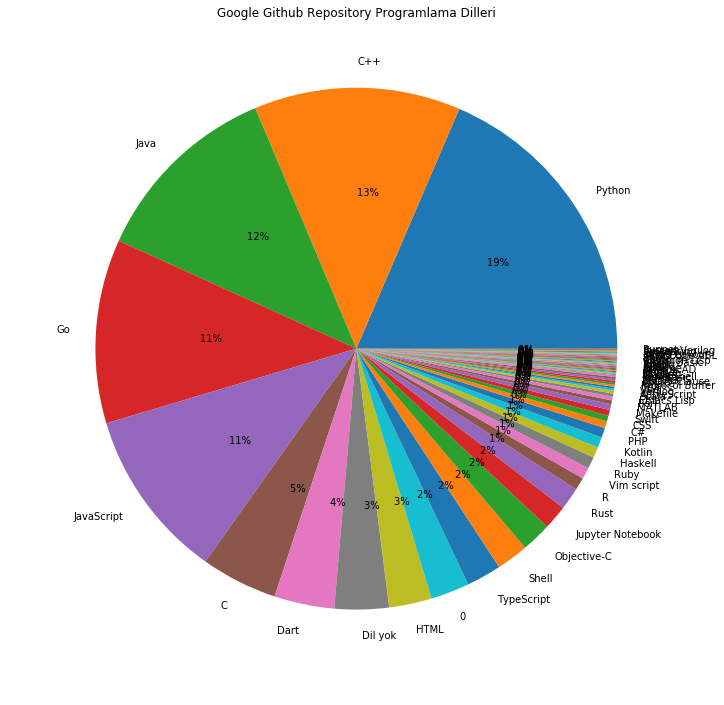

In [15]:
plt.figure(figsize=(15,12))
df['Dil'].value_counts().plot.pie(autopct='%9.0f%%')
plt.xlabel(" ",fontsize = 20)
plt.ylabel(" ", fontsize = 20)
plt.title("Google Github Repository Programlama Dilleri")


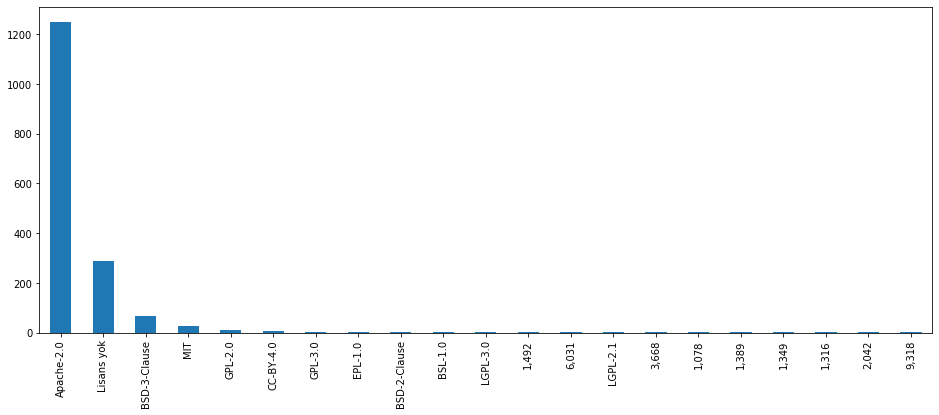

In [16]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16,6))
df['Lisans'].value_counts().plot.bar()